In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [12]:
data = pd.read_csv('customer_churn.csv')
data.head()
print(data.columns)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [13]:
print(data.isnull().sum())
data.dropna(inplace=True)

# Select relevant columns including Gender
data = data[['CustomerID', 'Tenure', 'Churn', 'Gender']]  # Ensure 'Gender' is included

# Display the cleaned data and columns
print(data.head())
print(data.columns)

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
   CustomerID  Tenure  Churn  Gender
0         2.0    39.0    1.0  Female
1         3.0    49.0    1.0  Female
2         4.0    14.0    1.0  Female
3         5.0    38.0    1.0    Male
4         6.0    32.0    1.0    Male
Index(['CustomerID', 'Tenure', 'Churn', 'Gender'], dtype='object')


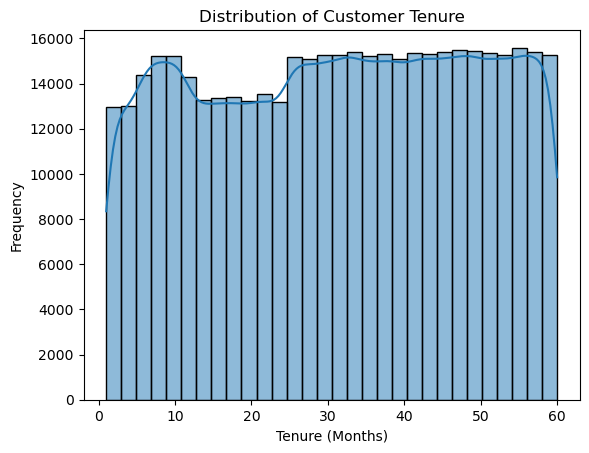

In [5]:
sns.histplot(data['Tenure'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

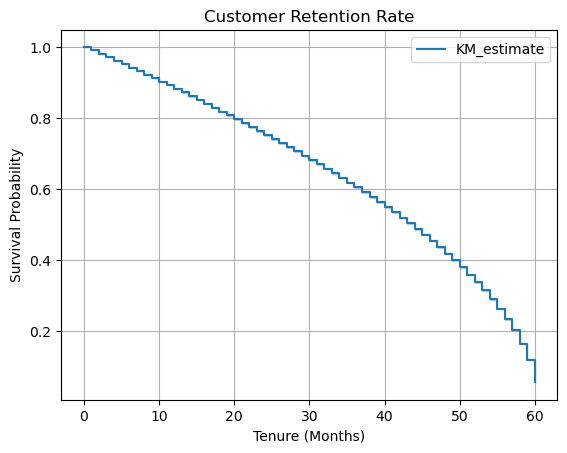

In [6]:
kmf = KaplanMeierFitter()
kmf.fit(durations=data['Tenure'], event_observed=data['Churn'])
kmf.plot_survival_function()
plt.title('Customer Retention Rate')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

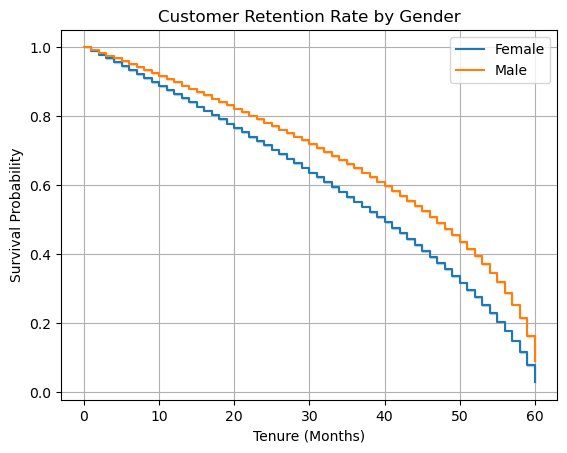

In [14]:
for gender, group in data.groupby('Gender'):
    kmf.fit(durations=group['Tenure'], event_observed=group['Churn'], label=gender)
    kmf.plot_survival_function()

plt.title('Customer Retention Rate by Gender')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()